In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [58]:
# Chargez le fichier CSV dans un DataFrame Pandas
df = pd.read_csv('./src/datasets/csv/valeurs_foncieres_affichage.csv', encoding='utf-8', dtype={'code_commune': str, 'code_departement': str})

In [59]:
# Afficher le type de données de chaque colonne
print("Type de données de chaque colonne :")
print(df.dtypes)

Type de données de chaque colonne :
Unnamed: 0                     int64
date_mutation                 object
valeur_fonciere              float64
code_commune                  object
code_departement              object
type_local                    object
surface_reelle_bati          float64
nombre_pieces_principales    float64
surface_terrain              float64
dtype: object


In [60]:
# Sélectionner les colonnes nécessaires pour la régression linéaire
df = df[['surface_reelle_bati', 'nombre_pieces_principales', 'surface_terrain', 'valeur_fonciere', 'type_local']]

# Afficher les premières lignes du DataFrame pour vérification
print("\nLes premières lignes du DataFrame après la sélection des colonnes nécessaires :")
print(df.head())


Les premières lignes du DataFrame après la sélection des colonnes nécessaires :
   surface_reelle_bati  nombre_pieces_principales  surface_terrain  \
0                170.0                        7.0           3789.0   
1                170.0                        7.0            500.0   
2                170.0                        7.0           1500.0   
3                 90.0                        4.0            903.0   
4                 99.0                        3.0            818.0   

   valeur_fonciere type_local  
0         360000.0     Maison  
1         360000.0     Maison  
2         360000.0     Maison  
3         190000.0     Maison  
4         220000.0     Maison  


In [61]:
# Convertir la variable catégorielle en variables indicatrices
df = pd.get_dummies(df, columns=['type_local'])

# Afficher les premières lignes du DataFrame pour vérification
print("\nLes premières lignes du DataFrame après la conversion des variables catégorielles en variables indicatrices :")
print(df.head())



Les premières lignes du DataFrame après la conversion des variables catégorielles en variables indicatrices :
   surface_reelle_bati  nombre_pieces_principales  surface_terrain  \
0                170.0                        7.0           3789.0   
1                170.0                        7.0            500.0   
2                170.0                        7.0           1500.0   
3                 90.0                        4.0            903.0   
4                 99.0                        3.0            818.0   

   valeur_fonciere  type_local_Appartement  type_local_Maison  
0         360000.0                   False               True  
1         360000.0                   False               True  
2         360000.0                   False               True  
3         190000.0                   False               True  
4         220000.0                   False               True  


In [62]:
# Diviser les données en variables explicatives (X) et la variable cible (y)
X = df.drop('valeur_fonciere', axis=1)
y = df['valeur_fonciere']

In [63]:
# Initialiser une liste pour stocker les RMSE
train_rmse_list = []
test_rmse_list = []
test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5]  # Différentes tailles de l'ensemble de test


In [64]:
for test_size in test_sizes:
    # Diviser les données en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # Créer un modèle de régression linéaire
    model = LinearRegression()
    
    # Entraîner le modèle sur l'ensemble d'entraînement
    model.fit(X_train, y_train)
    
    # Faire des prédictions sur l'ensemble d'entraînement et d'évaluation
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    
    # Calculer l'erreur quadratique moyenne (RMSE) pour l'ensemble d'entraînement
    rmse_train = mean_squared_error(y_train, train_predictions, squared=False)
    
    # Calculer l'erreur quadratique moyenne (RMSE) pour l'ensemble de test
    rmse_test = mean_squared_error(y_test, test_predictions, squared=False)
    
    # Ajouter les RMSE à la liste
    train_rmse_list.append(rmse_train)
    test_rmse_list.append(rmse_test)

c:\Users\teren\Documents\GitHub\LocaTrend_application\venv\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\teren\Documents\GitHub\LocaTrend_application\venv\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\teren\Documents\GitHub\LocaTrend_application\venv\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\teren\Documents\GitHub\LocaTrend_application\venv\lib\site-packages\sklearn\metrics\_regression.py:4

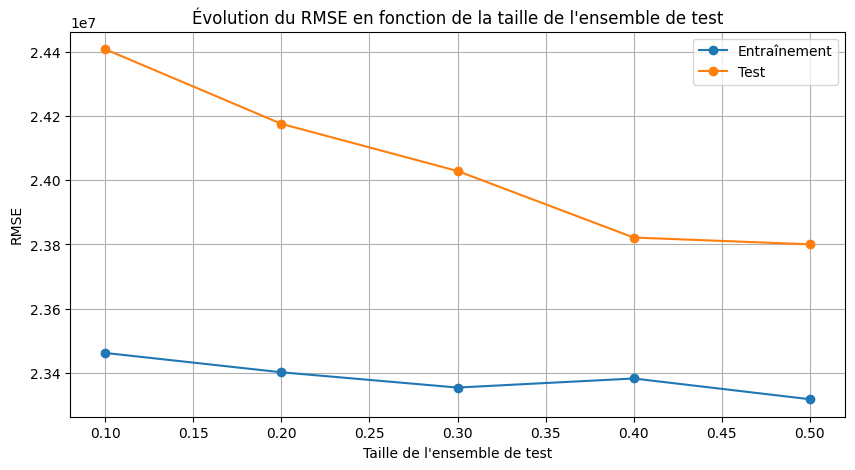

In [65]:
# Créer le graphique de convergence
plt.figure(figsize=(10, 5))
plt.plot(test_sizes, train_rmse_list, label='Entraînement', marker='o')
plt.plot(test_sizes, test_rmse_list, label='Test', marker='o')
plt.title('Évolution du RMSE en fonction de la taille de l\'ensemble de test')
plt.xlabel('Taille de l\'ensemble de test') #axe des abscisses
plt.ylabel('RMSE') #axe des ordonnées
plt.legend()
plt.grid(True)
plt.show()

Le fait que les deux courbes ne se touchent pas du tout peut être une indication de **surajustement du modèle**.\
Lorsque les performances sur **l'ensemble d'entraînement** et **l'ensemble de test** diffèrent considérablement et que les courbes ne convergent pas, cela suggère que le modèle est incapable de généraliser correctement aux nouvelles données.

# Test avec une des tailles de testset plus grand

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [67]:
# Chargez le fichier CSV dans un DataFrame Pandas
df = pd.read_csv('./src/datasets/csv/valeurs_foncieres_affichage.csv', encoding='utf-8', dtype={'code_commune': str, 'code_departement': str})

In [68]:
# Sélectionner les colonnes nécessaires pour la régression linéaire
df = df[['surface_reelle_bati', 'nombre_pieces_principales', 'surface_terrain', 'valeur_fonciere', 'type_local']]

In [69]:
# Convertir la variable catégorielle en variables indicatrices
df = pd.get_dummies(df, columns=['type_local'])

# Afficher les premières lignes du DataFrame pour vérification
print("\nLes premières lignes du DataFrame après la conversion des variables catégorielles en variables indicatrices :")
print(df.head())


Les premières lignes du DataFrame après la conversion des variables catégorielles en variables indicatrices :
   surface_reelle_bati  nombre_pieces_principales  surface_terrain  \
0                170.0                        7.0           3789.0   
1                170.0                        7.0            500.0   
2                170.0                        7.0           1500.0   
3                 90.0                        4.0            903.0   
4                 99.0                        3.0            818.0   

   valeur_fonciere  type_local_Appartement  type_local_Maison  
0         360000.0                   False               True  
1         360000.0                   False               True  
2         360000.0                   False               True  
3         190000.0                   False               True  
4         220000.0                   False               True  


In [70]:
# Diviser les données en variables explicatives (X) et la variable cible (y)
X = df.drop('valeur_fonciere', axis=1)
y = df['valeur_fonciere']

In [71]:
# Initialiser une liste pour stocker les RMSE
train_rmse_list = []
test_rmse_list = []
test_sizes = [0.1, 0.3, 0.5]  # Différentes tailles de l'ensemble de test

In [72]:
for test_size in test_sizes:
    # Diviser les données en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # Créer un modèle de régression linéaire
    model = LinearRegression()
    
    # Entraîner le modèle sur l'ensemble d'entraînement
    model.fit(X_train, y_train)
    
    # Faire des prédictions sur l'ensemble d'entraînement et d'évaluation
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    
    # Calculer l'erreur quadratique moyenne (RMSE) pour l'ensemble d'entraînement
    rmse_train = mean_squared_error(y_train, train_predictions, squared=False)
    
    # Calculer l'erreur quadratique moyenne (RMSE) pour l'ensemble de test
    rmse_test = mean_squared_error(y_test, test_predictions, squared=False)
    
    # Ajouter les RMSE à la liste
    train_rmse_list.append(rmse_train)
    test_rmse_list.append(rmse_test)

c:\Users\teren\Documents\GitHub\LocaTrend_application\venv\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\teren\Documents\GitHub\LocaTrend_application\venv\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\teren\Documents\GitHub\LocaTrend_application\venv\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\teren\Documents\GitHub\LocaTrend_application\venv\lib\site-packages\sklearn\metrics\_regression.py:4

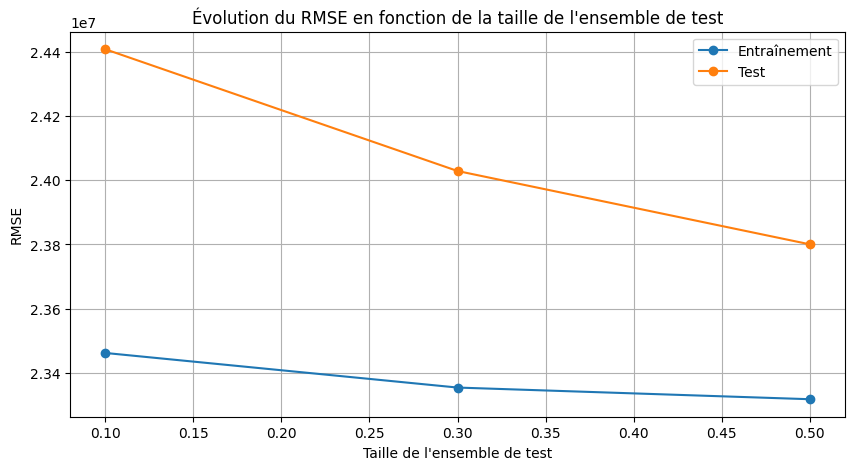

In [73]:
# Créer le graphique de convergence
plt.figure(figsize=(10, 5))
plt.plot(test_sizes, train_rmse_list, label='Entraînement', marker='o')
plt.plot(test_sizes, test_rmse_list, label='Test', marker='o')
plt.title('Évolution du RMSE en fonction de la taille de l\'ensemble de test')
plt.xlabel('Taille de l\'ensemble de test') #axe des abscisses
plt.ylabel('RMSE') #axe des ordonnées
plt.legend()
plt.grid(True)
plt.show()

# Génération d'un matrice de corrélation généralle

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

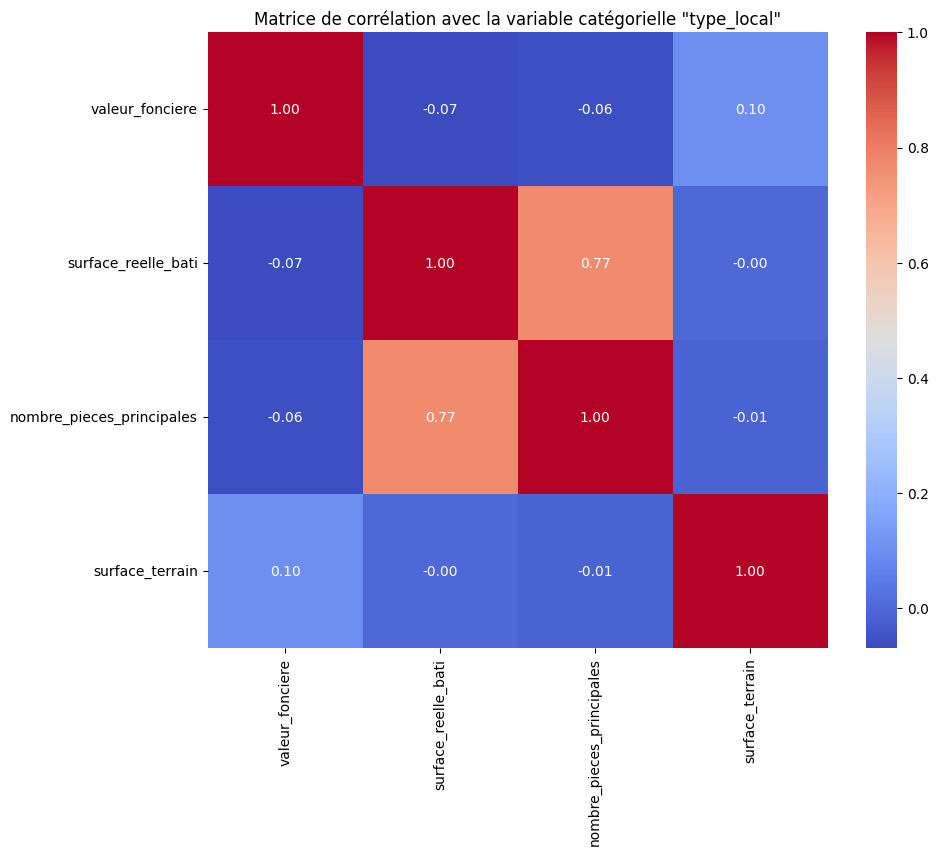

In [75]:
df = pd.read_csv('./src/datasets/csv/valeurs_foncieres_affichage.csv', encoding='utf-8', dtype={'code_commune': str, 'code_departement': str})

# Supprimer la colonne inutile "Unnamed: 0"
df = df.drop(columns=['Unnamed: 0'])

# Convertir la colonne 'type_local' en variable catégorielle
df['type_local'] = pd.Categorical(df['type_local'])

# Matrice de corrélation
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

# Créer une heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation avec la variable catégorielle "type_local"')
plt.show()

In [76]:
# Afficher la matrice de corrélation
print("Matrice de corrélation avec la variable catégorielle 'type_local' :")
print(correlation_matrix)

Matrice de corrélation avec la variable catégorielle 'type_local' :
                           valeur_fonciere  surface_reelle_bati  \
valeur_fonciere                   1.000000            -0.069848   
surface_reelle_bati              -0.069848             1.000000   
nombre_pieces_principales        -0.061189             0.766370   
surface_terrain                   0.100430            -0.000047   

                           nombre_pieces_principales  surface_terrain  
valeur_fonciere                            -0.061189         0.100430  
surface_reelle_bati                         0.766370        -0.000047  
nombre_pieces_principales                   1.000000        -0.011396  
surface_terrain                            -0.011396         1.000000  


# Création de matrices isolées

### Matrice de corrélation entre la valeur foncière et la surface réelle du bâti :

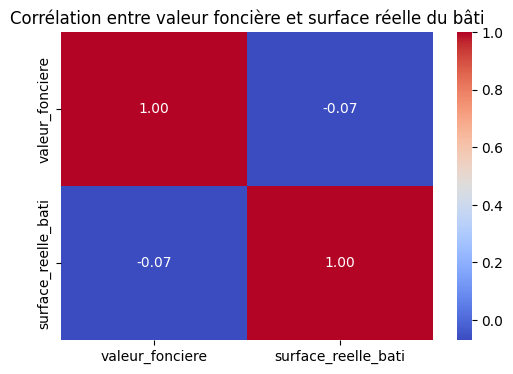

                     valeur_fonciere  surface_reelle_bati
valeur_fonciere             1.000000            -0.069848
surface_reelle_bati        -0.069848             1.000000


In [77]:
correlation_valeur_surface = df[['valeur_fonciere', 'surface_reelle_bati']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_valeur_surface, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Corrélation entre valeur foncière et surface réelle du bâti')
plt.show()
print(correlation_valeur_surface)

La corrélation entre la valeur foncière et la surface réelle du bâti est de -0.069848. Cela indique une corrélation très faible et presque nulle entre ces deux variables.

Une corrélation proche de zéro signifie qu'il n'y a pas de relation linéaire claire entre les deux variables. En d'autres termes, la valeur foncière n'est pas fortement influencée par la surface réelle du bâti, et vice versa.

### Matrice de corrélation entre la valeur foncière et le nombre de pièces principales :

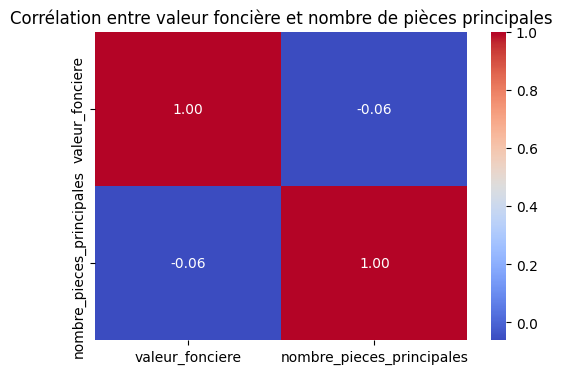

                           valeur_fonciere  nombre_pieces_principales
valeur_fonciere                   1.000000                  -0.061189
nombre_pieces_principales        -0.061189                   1.000000


In [78]:
correlation_valeur_pieces = df[['valeur_fonciere', 'nombre_pieces_principales']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_valeur_pieces, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Corrélation entre valeur foncière et nombre de pièces principales')
plt.show()
print(correlation_valeur_pieces)



La corrélation entre la valeur foncière et le nombre de pièces principales est de -0.061189. Encore une fois, cela indique une corrélation très faible entre ces deux variables.

Une corrélation proche de zéro suggère qu'il n'y a pas de relation linéaire claire entre la valeur foncière et le nombre de pièces principales. Cela signifie que le nombre de pièces principales d'une propriété n'a qu'un impact minime sur sa valeur foncière, du moins en ce qui concerne la relation linéaire entre ces deux variables.

### Matrice de corrélation entre la valeur foncière et la surface du terrain :

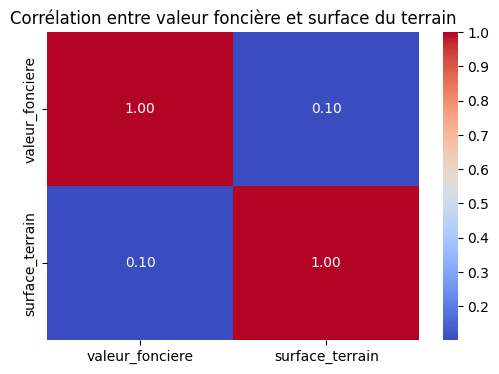

                 valeur_fonciere  surface_terrain
valeur_fonciere          1.00000          0.10043
surface_terrain          0.10043          1.00000


In [79]:
correlation_valeur_terrain = df[['valeur_fonciere', 'surface_terrain']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_valeur_terrain, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Corrélation entre valeur foncière et surface du terrain')
plt.show()
print(correlation_valeur_terrain)


La corrélation entre la valeur foncière et la surface du terrain est de 0.10043. Cette corrélation positive faible suggère une relation légèrement positive entre ces deux variables.

Cela signifie que, en général, une augmentation de la surface du terrain est associée à une légère augmentation de la valeur foncière. Cependant, la corrélation est faible, ce qui indique que la relation entre la valeur foncière et la surface du terrain n'est pas très forte et peut être influencée par d'autres facteurs.

### Matrice de corrélation entre la surface réelle du bâti et le nombre de pièces principales :

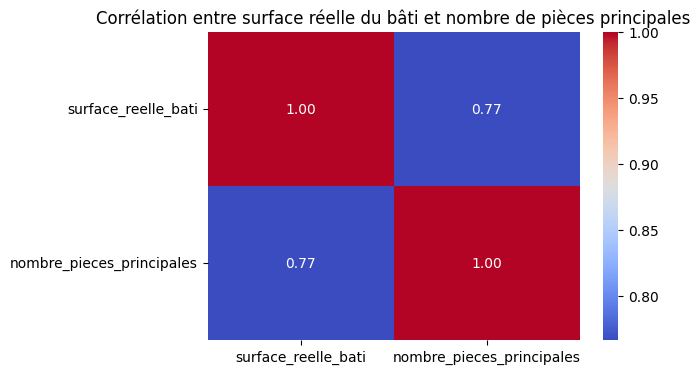

                           surface_reelle_bati  nombre_pieces_principales
surface_reelle_bati                    1.00000                    0.76637
nombre_pieces_principales              0.76637                    1.00000


In [80]:
correlation_surface_pieces = df[['surface_reelle_bati', 'nombre_pieces_principales']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_surface_pieces, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Corrélation entre surface réelle du bâti et nombre de pièces principales')
plt.show()
print(correlation_surface_pieces)

La corrélation entre la surface réelle du bâti et le nombre de pièces principales est de 0.76637. Cette corrélation positive modérée suggère une relation significative entre ces deux variables.

Une corrélation de 0.76637 indique que, en général, une augmentation de la surface réelle du bâti est associée à une augmentation significative du nombre de pièces principales. De même, une diminution de la surface réelle du bâti est généralement associée à une diminution du nombre de pièces principales.

Cette forte corrélation suggère qu'il existe une relation linéaire positive entre la surface réelle du bâti et le nombre de pièces principales.

### Matrice de corrélation entre la surface réelle du bâti et la surface du terrain :

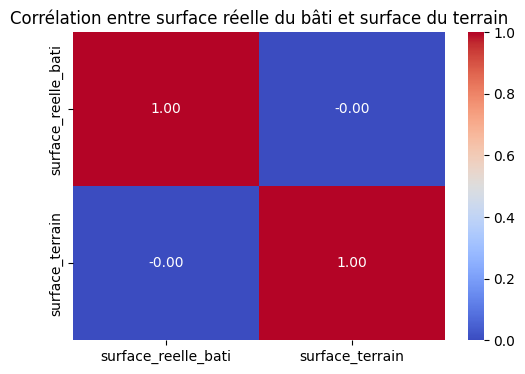

                     surface_reelle_bati  surface_terrain
surface_reelle_bati             1.000000        -0.000047
surface_terrain                -0.000047         1.000000


In [81]:
correlation_surface_terrain = df[['surface_reelle_bati', 'surface_terrain']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_surface_terrain, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Corrélation entre surface réelle du bâti et surface du terrain')
plt.show()
print(correlation_surface_terrain)

La corrélation entre la surface réelle du bâti et la surface du terrain est très faible, quasiment nulle, avec une valeur de -0.000047. Cela suggère qu'il n'y a pas de corrélation linéaire significative entre ces deux variables.

Une corrélation proche de zéro indique qu'il n'y a pas de relation linéaire claire entre la surface réelle du bâti et la surface du terrain. En d'autres termes, la taille du bâti n'est pas dépendante de la surface du terrain, du moins selon une relation linéaire.

# Autre approche

In [82]:
import pandas as pd

In [83]:
df = pd.read_csv('./src/datasets/csv/valeurs_foncieres_affichage.csv', encoding='utf-8', dtype={'code_commune': str, 'code_departement': str})

# Supprimer la colonne inutile "Unnamed: 0"
df = df.drop(columns=['Unnamed: 0'])